In [1]:
from IPython.display import Image

* [Сравнение двух выборок](#line_1)
* [Однофакторный дисперсионный анализ (One way ANOVA)](#line_2)
* [Двухфакторный дисперсионный анализ (Two way ANOVA)](#line_3)
* [Корреляция и Регрессия ](#line_4)
* [Линейная регрессия](#line_5)
* [Оценка взаимосвязи переменных ](#line_6)
* [Множественная регрессия](#line_7)

[17 Statistical Hypothesis Tests in Python (Cheat Sheet)](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/)

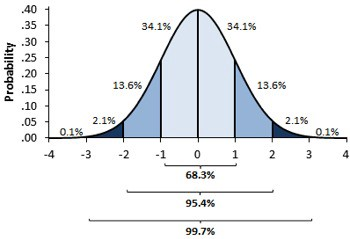

In [2]:
Image(filename='Standardised_Normal_curve.jpg') 

<b>Level of significance:</b> Refers to the degree of significance in which we accept or reject the null-hypothesis. 100% accuracy is not possible for accepting or rejecting a hypothesis, so we therefore select a level of significance that is usually 5%.<br>
This is normally denoted with alpha(maths symbol ) and generally it is 0.05 or 5% , which means your output should be 95% confident to give similar kind of result in each sample.

<b>Type I error:</b> When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

<b>Type II errors:</b> When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.

<b>scipy.stats.ttest_ind</b><br>
Рассчитайте Т-критерий для средних значений двух независимых выборок оценок.<br>
Это двусторонний тест для нулевой гипотезы о том, что 2 независимых образца имеют одинаковые средние (ожидаемые) значения. Этот тест предполагает, что по умолчанию совокупности имеют идентичные дисперсии.

<b>scipy.stats.ttest_rel</b><br>
Рассчитайте t-критерий по ДВУМЯ СВЯЗАННЫМ выборкам оценок, a и b.<br>
Это двусторонний тест для нулевой гипотезы о том, что 2 связанных или повторяющихся образца имеют одинаковые средние (ожидаемые) значения.

# Сравнение двух выборок <a class="anchor" id="line_1"></a>

In [6]:
import numpy as np
from scipy import stats
from math import sqrt
import os
import pandas as pd

import pylab 
import matplotlib.pyplot as plt

In [4]:
os.listdir()

['birds.csv',
 'atherosclerosis.csv',
 'Standardised_Normal_curve.jpg',
 'sst_ssr_sse.jpg',
 'Basics_of_statistics.ipynb',
 'genetherapy.csv',
 '.ipynb_checkpoints',
 'Concrete_Data.xls',
 'states.csv']

In [5]:
df = pd.read_csv('birds.csv')
df.head()

,var4,hormone,sex
0,17.859039,1,1
1,20.842343,1,1
2,19.318099,1,1
3,20.064451,1,1
4,17.620316,1,1


In [6]:
df.hormone.unique()

array([1, 0])

In [7]:
df.groupby('hormone')[['var4']].agg(['mean','std','count'])

var4                
              mean       std count
hormone                           
0        18.748103  3.284251    32
1        18.517958  3.325745    32

In [8]:
arr_0 = df[df.hormone==0].var4.to_numpy()
arr_1 = df[df.hormone==1].var4.to_numpy()

print('Arr_0')
print('Mean', round(np.mean(arr_0),5))
print('Std', round(np.std(arr_1),5))
print('Len', len(arr_0))
print('\nArr_1')
print('Mean', round(np.mean(arr_1),5))
print('Std', round(np.std(arr_1),5))
print('Len', len(arr_1))

Arr_0
Mean 18.7481
Std 3.27337
Len 32

Arr_1
Mean 18.51796
Std 3.27337
Len 32


In [9]:
# Дано
mean_1 = np.mean(arr_0)
sd_1 = np.std(arr_0)
N_1 = len(arr_0)

mean_2 = np.mean(arr_1)
sd_2 = np.std(arr_1)
N_2 = len(arr_1)

T = abs(mean_1 - mean_2)/sqrt((sd_1**2/N_1) + (sd_2**2/N_2))
d_free = N_1 + N_2 - 2
t = stats.t(df=d_free)
p = 1 - (t.cdf(T)-t.cdf(-T))

print(T)
print(f'p = {p}')

if p < 0.05:
    print('H0 - reject')
else:
    print('H0 - accepted')

0.2829938040047502
p = 0.7781243115755719
H0 - accepted


### T критерий

In [10]:
print('\033[1m' + "Student's t-test" + '\033[0m')
stat, p = stats.ttest_ind(arr_1, arr_0)
print('Уровень значимости =',round(p, 3))
if p < 0.05:
    print('H0 - reject')
    print('arr_1 и arr_0 \033[1mНЕ\033[0m из одной генеральной совокупности')
else:
    print('H0 - accepted')
    print('arr_1 и arr_0 из одной генеральной совокупности')
print('Stat:', round(stat, 4))

Student's t-test
Уровень значимости = 0.782
H0 - accepted
arr_1 и arr_0 из одной генеральной совокупности
Stat: -0.2785


## Требование Гомогенности Дисперсии
Дисперсия внутри групп примерно одинаковая<br>
Критерий Ливиня <b>scipy.stats.levene</b>

In [11]:
print('\033[1m' + "Levene's test" + '\033[0m')

stat, p = stats.levene(arr_1, arr_0)

print('Уровень значимости =',round(p, 3))
if p < 0.05:
    print('H0 - reject')
    print('Дисперсия внутри групп \033[1mНЕ\033[0m одинаковая')
else:
    print('H0 - accepted')
    print('Дисперсия внутри групп примерно одинаковая')
print('Stat:', round(stat, 4))

Levene's test
Уровень значимости = 0.591
H0 - accepted
Дисперсия внутри групп примерно одинаковая
Stat: 0.291


## Проверка распределения на нормальность
### Графический способ + Тесты

In [7]:
def norm_test_info_by_method(arr, method = False, name = False):
    if not method:
        from scipy.stats import kstest
        method = kstest
    if not name:
        name = method.__name__ 
        name = name[0].upper() + name[1:]
        
    if method.__name__ == 'kstest':
        stat, p = method(arr, 'norm')
    else:
        stat, p = method(arr)
    print('\033[1m' + name + '\033[0m')
    print('Уровень значимости =',round(p, 3))
    if p < 0.05:
        print('H0 - reject')
        print('Распределение \033[1mНЕ\033[0m нормальное')
    else:
        print('H0 - accepted')
        print('Распределение нормальное')
    print('Stat:', round(stat, 4), end='\n\n')


def check_normal_distribution(arr):
    
    import numpy as np
    # import pylab 
    import matplotlib.pyplot as plt
    from scipy.stats import kstest, shapiro

    norm_test_info_by_method(stats.zscore(arr), kstest, 'Kolmogorov–Smirnov test')
    norm_test_info_by_method(arr, shapiro, 'Shapiro–Wilk test')
        
    mean = np.mean(arr)
    sd = np.std(arr)
    plt.figure(figsize = [6.4*2, 4.8])  # Создаем фигуру qq_plot
    plt.subplot(1, 2, 1)
    # Создаем график QQ-plot при помощи функции по поиску квантелей значений нашего распределения
    stats.probplot(arr, dist="norm", plot=plt)  
    plt.title('QQ-plot / Квантиль-квантиль')  # Заголовок
    plt.xlabel('Квантили Z-распределения')  # Подпись по оси X
    plt.ylabel('Квантили фактического распределения')  # Подпись по оси Y
    plt.grid(True)  # Включить сетку
    # Построим гистограмму
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(arr, 5, density=True, facecolor='g', alpha=0.75, label='Гистограмма')  
    plt.title('Гистограмма распределения')  # Заголовок
    plt.xlabel('Промежутки наблюдений')  # Подпись по оси X
    plt.ylabel('Плотность наблюдений')  # Подпись по оси Y
    plt.grid(True) 
    # Построим поверх гистограммы график Z-распределения
    x = np.linspace(mean - 3*sd, mean + 3*sd, 1000)  # Делаем массив значений Z-распределения
    # Строим график Z-распределения
    plt.plot(x, stats.norm.pdf(x, mean, sd), color='red', label='Z-распределение')  
    plt.legend() 
    plt.show()  # Показать фигуру   

Kolmogorov–Smirnov test
Уровень значимости = 0.433
H0 - accepted
Распределение нормальное
Stat: 0.1492

Shapiro–Wilk test
Уровень значимости = 0.083
H0 - accepted
Распределение нормальное
Stat: 0.9415



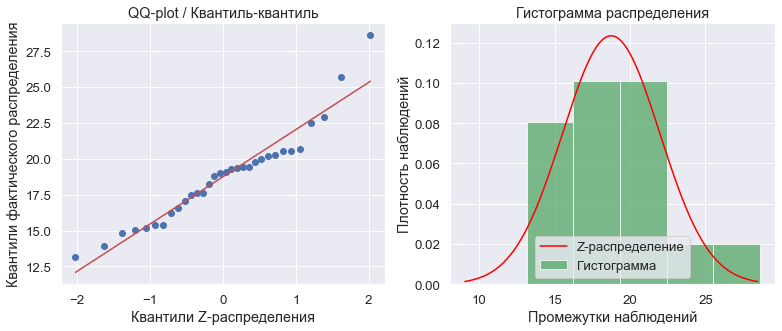

In [89]:
check_normal_distribution(arr_0)

# Однофакторный дисперсионный анализ (One way ANOVA) <a class="anchor" id="line_2"></a>

In [16]:
import os 
import pandas as pd

In [ ]:
os.listdir()

In [17]:
df = pd.read_csv('genetherapy.csv')

In [18]:
df.groupby('Therapy').agg(["mean", "std", "count"])['expr']

,mean,std,count
Therapy,,,
A,99.733333,4.165619,15
B,98.800000,5.894307,15
C,94.400000,5.193402,15
D,92.333333,3.735289,15


In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('expr ~ Therapy', data=df).fit()
table = sm.stats.anova_lm(model)
table

,df,sum_sq,mean_sq,F,PR(>F)
Therapy,3.0,560.716667,186.905556,8.037302,0.000152
Residual,56.0,1302.266667,23.254762,NaN,NaN


In [20]:
import scipy

1 - scipy.stats.f.cdf(8.037302, 3, 56)

0.00015249730302424602

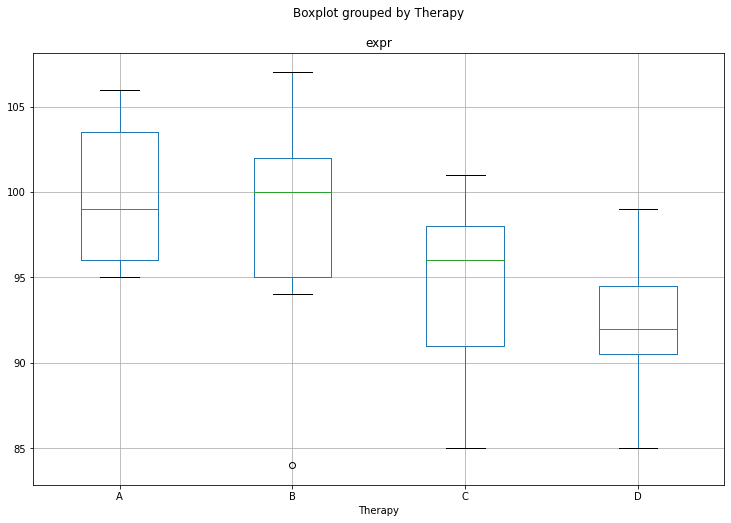

In [21]:
df.boxplot('expr', by='Therapy', grid=True, figsize=(12,8));

Kolmogorov–Smirnov test
Уровень значимости = 0.803
H0 - accepted
Распределение нормальное
Stat: 0.1565


Shapiro–Wilk test
Уровень значимости = 0.062
H0 - accepted
Распределение нормальное
Stat: 0.8877


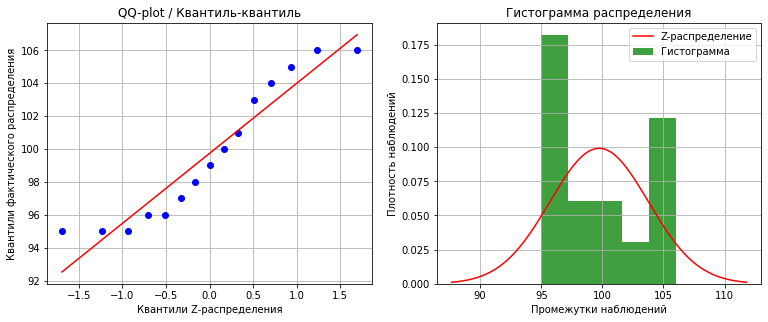

Kolmogorov–Smirnov test
Уровень значимости = 0.629
H0 - accepted
Распределение нормальное
Stat: 0.1835


Shapiro–Wilk test
Уровень значимости = 0.237
H0 - accepted
Распределение нормальное
Stat: 0.926


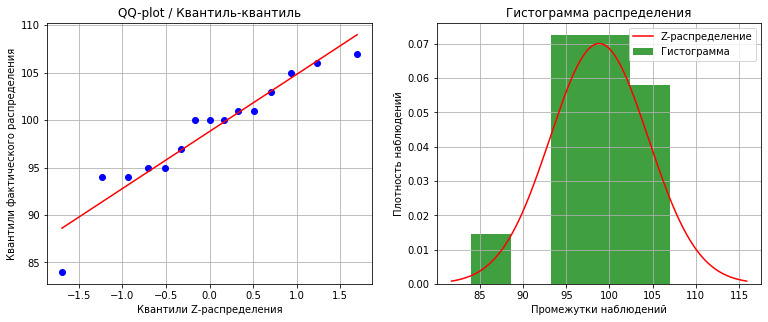

Kolmogorov–Smirnov test
Уровень значимости = 0.791
H0 - accepted
Распределение нормальное
Stat: 0.1584


Shapiro–Wilk test
Уровень значимости = 0.262
H0 - accepted
Распределение нормальное
Stat: 0.9288


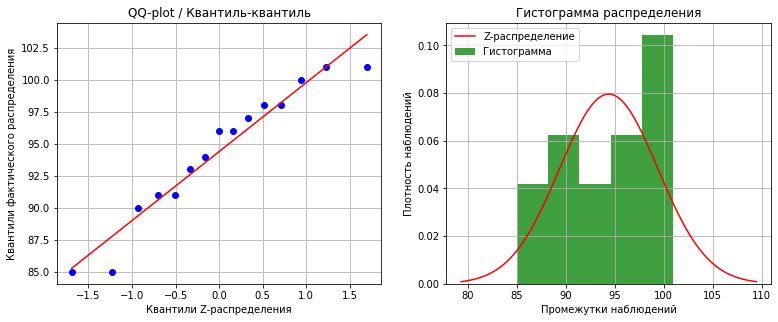

Kolmogorov–Smirnov test
Уровень значимости = 0.999
H0 - accepted
Распределение нормальное
Stat: 0.0892


Shapiro–Wilk test
Уровень значимости = 1.0
H0 - accepted
Распределение нормальное
Stat: 0.9913


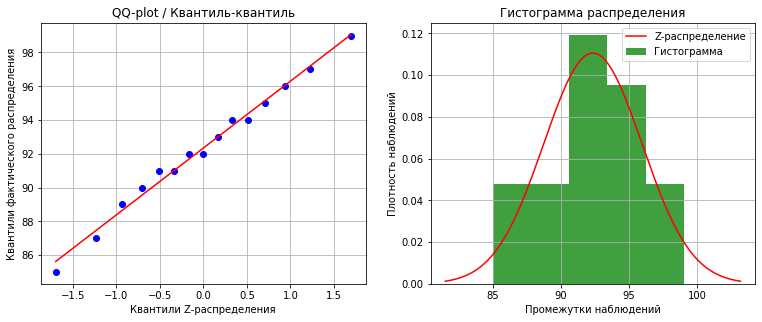

In [23]:
# Проверка на нормальное распределение каждой группы 

import matplotlib.pyplot as plt
from scipy.stats import kstest, shapiro, zscore

unique_therapy = df['Therapy'].unique()
for th in unique_therapy:
    tmp_data = df[df['Therapy'] == th]['expr']
    check_normal_distribution(tmp_data)

In [24]:
stat, p = stats.f_oneway(*[list(x) for i, x in df.groupby('Therapy').expr])
print(stat, p)

8.03730248114399 0.00015249722895229536


# Множественные сравнения 
### Критерий Тьюки (Tukey's HSD test)

In [25]:
from statsmodels.stats.multicomp import MultiComparison

MultiComp = MultiComparison(df['expr'], df['Therapy'])

print(MultiComp.tukeyhsd().summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -0.9333    0.9  -5.5961  3.7294  False
     A      C  -5.3333 0.0189  -9.9961 -0.6706   True
     A      D     -7.4  0.001 -12.0628 -2.7372   True
     B      C     -4.4 0.0712  -9.0628  0.2628  False
     B      D  -6.4667 0.0029 -11.1294 -1.8039   True
     C      D  -2.0667 0.6296  -6.7294  2.5961  False
-----------------------------------------------------


# Двухфакторный дисперсионный анализ (Two way ANOVA) <a class="anchor" id="line_3"></a>

In [ ]:
os.listdir()

In [28]:
df = pd.read_csv('atherosclerosis.csv')
df.groupby(['age','dose']).agg(["count", "mean", "std"])['expr']

count        mean       std
age dose                             
1   D1       16  104.758464  5.863454
    D2       16  105.545864  4.369024
2   D1       16  101.004805  5.116310
    D2       16  102.273629  5.135374

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('expr ~ age + dose + age:dose', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
dose,16.912241,1.0,0.638094,0.427552
age,197.452754,1.0,7.449841,0.008313
age:dose,0.927077,1.0,0.034978,0.852272
Residual,1590.257424,60.0,NaN,NaN


In [30]:
from bioinfokit.analys import stat

res = stat()
res.anova_stat(df=df, res_var='expr', anova_model='expr ~ age + dose + age:dose')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
dose,1.0,16.912241,16.912241,0.638094,0.427552
age,1.0,197.452754,197.452754,7.449841,0.008313
age:dose,1.0,0.927077,0.927077,0.034978,0.852272
Residual,60.0,1590.257424,26.504290,NaN,NaN


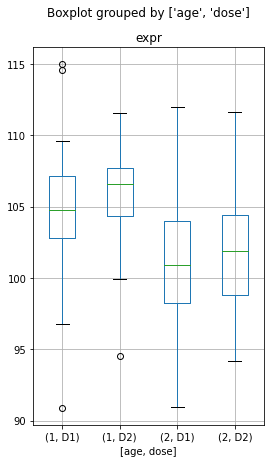

In [31]:
df.boxplot('expr', by=['age','dose'], grid=True, figsize=(4,7));

In [32]:
df = pd.read_csv('birds.csv')
df.groupby(['hormone','sex']).agg(["count", "mean", "std"])['var4']

count       mean       std
hormone sex                            
0       0       16  19.887291  3.677211
        1       16  17.608916  2.449753
1       0       16  17.292254  2.864428
        1       16  19.743662  3.383574

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('var4 ~ hormone + sex + hormone:sex', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
hormone,0.847472,1.0,0.086528,0.769653
sex,0.119762,1.0,0.012228,0.912318
hormone:sex,89.483384,1.0,9.136390,0.003682
Residual,587.650394,60.0,NaN,NaN


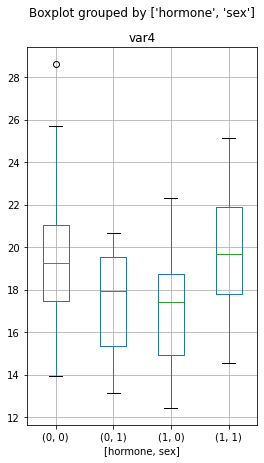

In [35]:
df.boxplot('var4', by=['hormone','sex'], grid=True, figsize=(4,7));

,Source,SS,DF,MS,F,p-unc,np2
0,hormone,0.847472,1,0.847472,0.086528,0.769653,0.001440
1,sex,0.119762,1,0.119762,0.012228,0.912318,0.000204
2,hormone * sex,89.483384,1,89.483384,9.136390,0.003682,0.132150
3,Residual,587.650394,60,9.794173,NaN,NaN,NaN


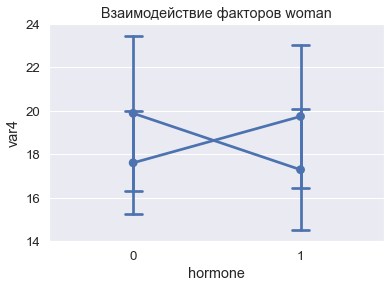

In [39]:
import pandas as pd
import numpy as np 
import pingouin as pg
import seaborn as sns
import matplotlib.pyplot as plt


df.groupby(['hormone', 'sex']).describe()

aov = pg.anova(dv='var4', between=['hormone', 'sex'], data=df, detailed=True)
display(aov)

sns.set(context='notebook', font_scale=1.2)
sns.pointplot(data=df[df['sex']==1], x='hormone', y='var4', capsize=.1, ci='sd')
plt.ylim(14, 24)
_ = plt.title('Взаимодействие факторов man')

sns.set(context='notebook', font_scale=1.2)
sns.pointplot(data=df[df['sex']==0], x='hormone', y='var4', capsize=.1, ci='sd')
plt.ylim(14, 24)
_ = plt.title('Взаимодействие факторов woman')

# Корреляция и Регрессия  <a class="anchor" id="line_4"></a>

Коэффициент корреляции Пирсона и значение p для проверки отсутствия корреляции.

H0: the two samples are independent.<br>
H1: there is a dependency between the samples.

### Условия применения коэффициента корреляции

Убрать выбросы, нормальное распределение<br>
Или воспользоваться не параметрическим методом<br>
<b>scipy.stat.spearmanr</b><br>
<b>scipy.stat.kendalltau</b>

In [8]:
def corr_info_by_method(arr_0, arr_1, method = False):
    if not method:
        from scipy.stats import pearsonr
        method = pearsonr
    
    corr, p = method(arr_0, arr_1)
    name = method.__name__ 
    print('\033[1m' + name[0].upper() + name[1:] + " correlation coefficient" + '\033[0m')
    print('Уровень значимости =',round(p, 3))
    if p < 0.05:
        print('H0 - reject')
        print('Корреляция возможна')
    else:
        print('H0 - accepted')
        print('Корреляция отсутствует')
    print('Коэффициент корреляции:', round(corr, 4), end='\n\n')

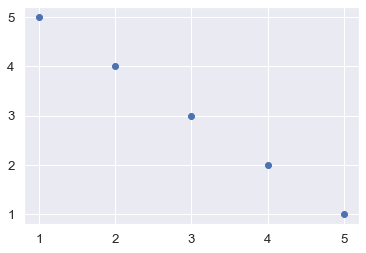

Pearsonr correlation coefficient
Уровень значимости = 0.0
H0 - reject
Корреляция возможна
Коэффициент корреляции: -1.0

Spearmanr correlation coefficient
Уровень значимости = 0.0
H0 - reject
Корреляция возможна
Коэффициент корреляции: -1.0

Kendalltau correlation coefficient
Уровень значимости = 0.017
H0 - reject
Корреляция возможна
Коэффициент корреляции: -1.0



In [68]:
X = stats.norm.rvs(loc=0, scale=1, size=50)
Y = stats.norm.rvs(loc=0, scale=1, size=50)
X = [4,5,2,3,1]
Y = [2,1,4,3,5]

plt.scatter(X,Y)

plt.grid(True)
plt.show()

corr_info_by_method(X, Y, stats.pearsonr)
corr_info_by_method(X, Y, stats.spearmanr)
corr_info_by_method(X, Y, stats.kendalltau)

In [129]:
df = pd.read_excel('Concrete_Data.xls')
df.columns=['Component'+str(i) for i in range(1,8)]+['Age']+['y']

Kolmogorov–Smirnov test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.0786


Shapiro–Wilk test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.959


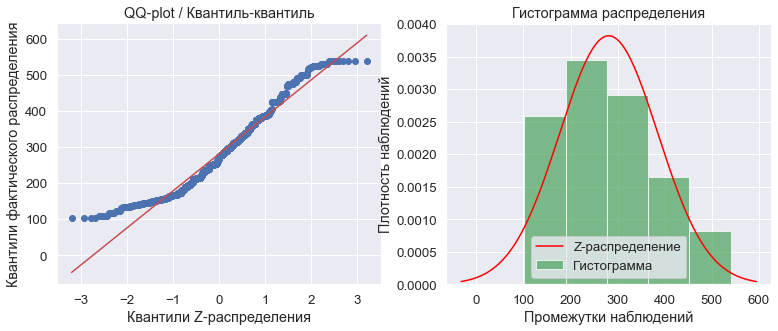

Kolmogorov–Smirnov test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.2615


Shapiro–Wilk test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.8124


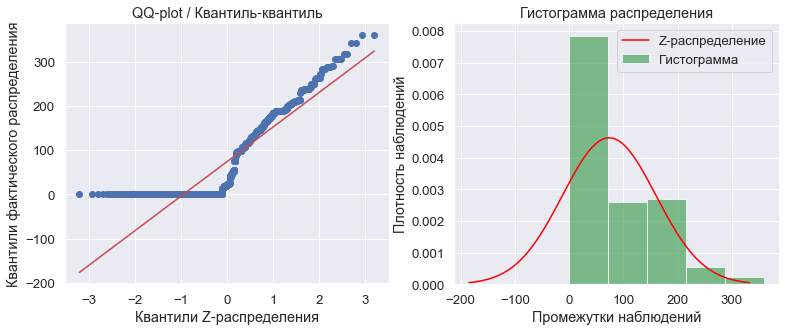

Kolmogorov–Smirnov test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.3511


Shapiro–Wilk test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.762


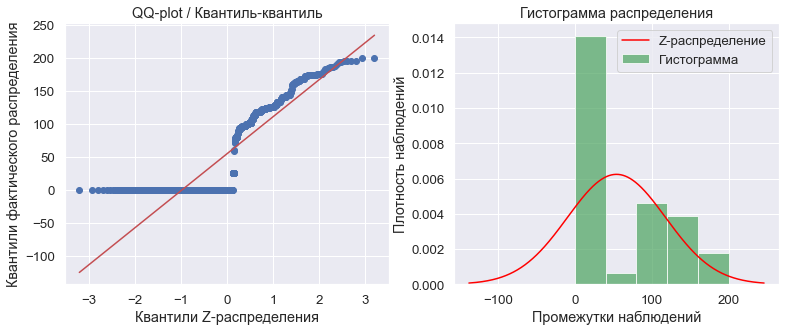

Kolmogorov–Smirnov test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.0736


Shapiro–Wilk test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.9804


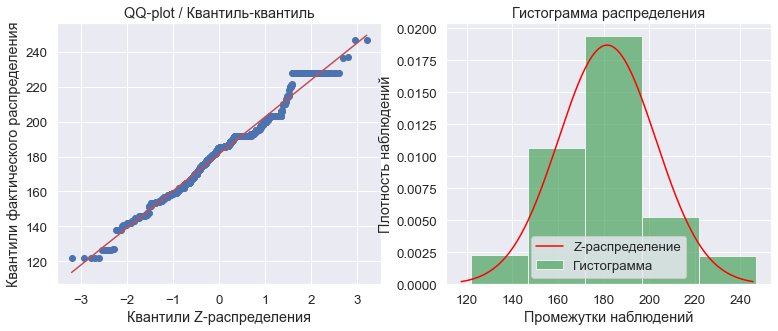

Kolmogorov–Smirnov test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.2185


Shapiro–Wilk test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.8661


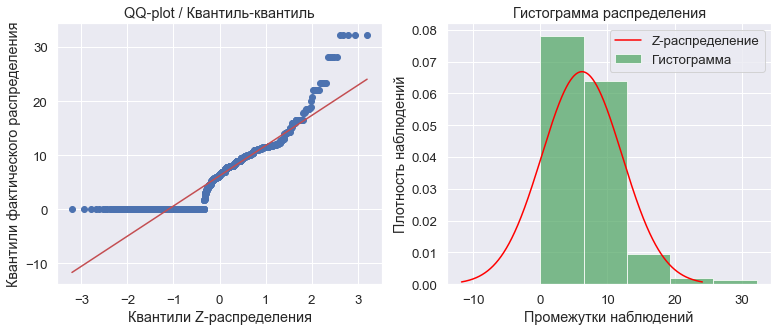

Kolmogorov–Smirnov test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.0637


Shapiro–Wilk test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.9825


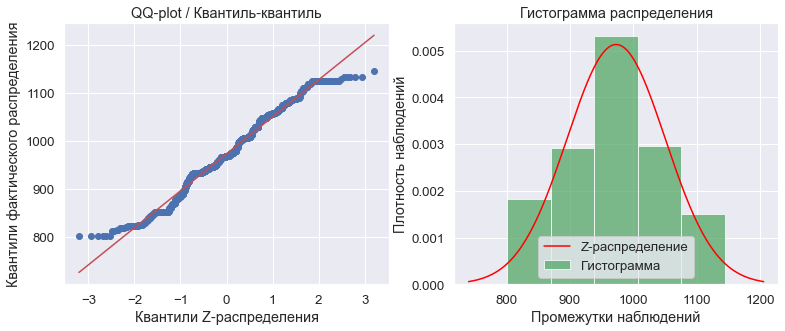

Kolmogorov–Smirnov test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.0857


Shapiro–Wilk test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.9807


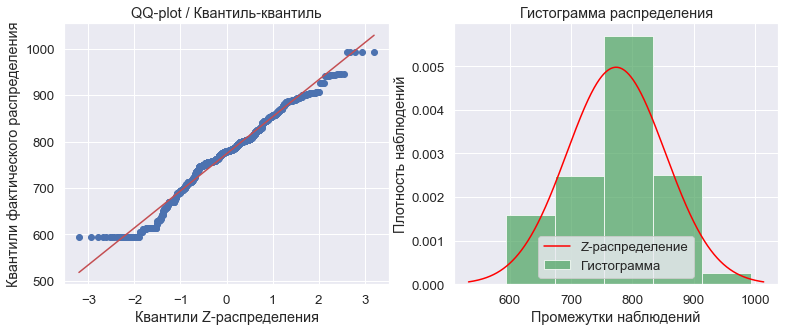

In [73]:
for i in range(1,8):
    check_normal_distribution(df['Component'+str(i)])

# Линейная регрессия <a class="anchor" id="line_5"></a>

In [13]:
from sklearn.linear_model import LinearRegression as LR
import random
from math import sin

y = 13.443 + (0.08) * x
Intercept (b_0): 13.442794872825289
Slope (b_1):     0.07957957332231688
Score:           0.24783741936758186

Pearsonr correlation coefficient
Уровень значимости = 0.0
H0 - reject
Корреляция возможна
Коэффициент корреляции: 0.4978

Spearmanr correlation coefficient
Уровень значимости = 0.0
H0 - reject
Корреляция возможна
Коэффициент корреляции: 0.4776

Kendalltau correlation coefficient
Уровень значимости = 0.0
H0 - reject
Корреляция возможна
Коэффициент корреляции: 0.3271



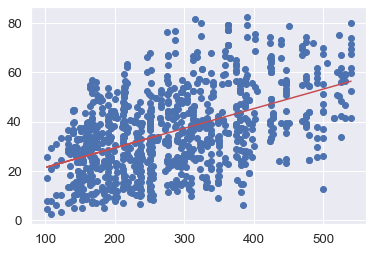

In [132]:
X = stats.norm.rvs(loc=0, scale=1, size=350)
Y = stats.norm.rvs(loc=0, scale=1, size=350)

X = np.array([x for x in range(100)])
Y = [random.random() + sin(x/40) for x in range(100)]

X = df.Component1.to_numpy()
Y = df.y

# X = np.array(x_r)
# Y = y_r

model_lr =  LR().fit(X.reshape((-1, 1)), Y)
b_0 = model_lr.intercept_
b_1 = model_lr.coef_[0]

print(f'y = {round(b_0, 3)} + ({round(b_1, 3)}) * x')
print('Intercept (b_0):', b_0)
print('Slope (b_1):    ', b_1)
print('Score:          ', model_lr.score(X.reshape((-1, 1)),Y), end='\n\n')

plt.scatter(X,Y)

y_data_model_lr = [b_0 + b_1*x for x in X]

plt.plot(X, [b_0 + b_1*x for x in X], color='r')

corr_info_by_method(X, Y, stats.pearsonr)
corr_info_by_method(X, Y, stats.spearmanr)
corr_info_by_method(X, Y, stats.kendalltau)

plt.grid(True)
plt.show()

## Смотрим на остатки

In [ ]:
Image(filename='sst_ssr_sse.jpg') 

Kolmogorov–Smirnov test
Уровень значимости = 0.084
H0 - accepted
Распределение нормальное
Stat: 0.039

Shapiro–Wilk test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.9908



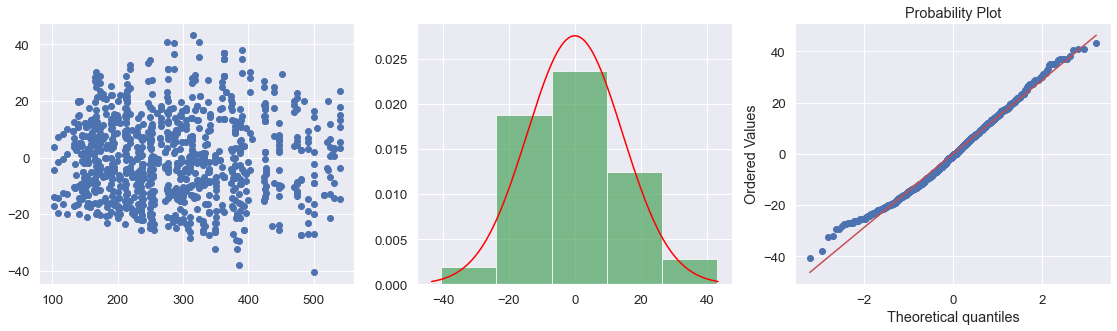

In [97]:
mean_y = np.mean(Y)
list_sse = [Y[x] - y_data_model_lr[x] for x in range(len(Y))]

norm_test_info_by_method(stats.zscore(list_sse), kstest, 'Kolmogorov–Smirnov test')
norm_test_info_by_method(list_sse, shapiro, 'Shapiro–Wilk test')

mean = np.mean(list_sse)
sd = np.std(list_sse)

plt.figure(figsize = [6.4*3, 4.8])  # Создаем фигуру qq_plot

plt.subplot(1, 3, 1)
plt.scatter(X, list_sse)
plt.grid(True)  # Включить сетку

plt.subplot(1, 3, 2)
n, bins, patches = plt.hist(list_sse, 5, density=True, facecolor='g', alpha=0.75)
x = np.linspace(mean - 3*sd, mean + 3*sd, 1000)  # Делаем массив значений Z-распределения
plt.plot(x, stats.norm.pdf(x, mean, sd), color='red', label='Z-распределение')
plt.grid(True)  # Включить сетку
 
plt.subplot(1, 3, 3)
stats.probplot(list_sse, dist="norm", plot=plt)  
plt.grid(True)  # Включить сетку
    
plt.show()  # Показать фигуру

# Оценка взаимосвязи переменных  <a class="anchor" id="line_6"></a>

In [98]:
os.listdir()

['birds.csv',
 'atherosclerosis.csv',
 'Standardised_Normal_curve.jpg',
 'sst_ssr_sse.jpg',
 'Basics_of_statistics.ipynb',
 'genetherapy.csv',
 '.ipynb_checkpoints',
 'Concrete_Data.xls',
 'states.csv']

In [10]:
df = pd.read_csv('states.csv')

In [11]:
df.head(5)

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


,count,mean,std,min,max
poverty,51.0,11.349020,3.099185,5.6,18.0
hs_grad,51.0,86.011765,3.725998,77.2,92.1



---------Проверка на нормальное распределение ---------

Kolmogorov–Smirnov test
Уровень значимости = 0.399
H0 - accepted
Распределение нормальное
Stat: 0.1222

Shapiro–Wilk test
Уровень значимости = 0.014
H0 - reject
Распределение НЕ нормальное
Stat: 0.9411



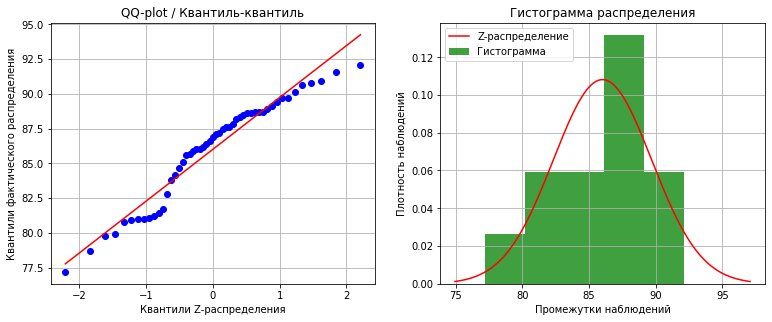

Kolmogorov–Smirnov test
Уровень значимости = 0.382
H0 - accepted
Распределение нормальное
Stat: 0.124

Shapiro–Wilk test
Уровень значимости = 0.054
H0 - accepted
Распределение нормальное
Stat: 0.9555



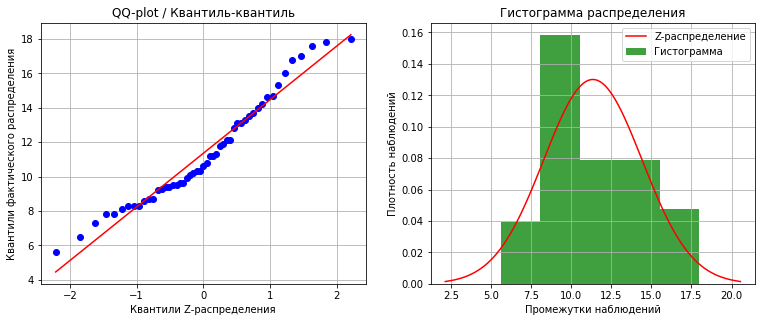


---------Корреляция ---------



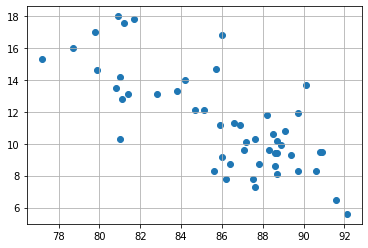

Pearsonr correlation coefficient
Уровень значимости = 0.0
H0 - reject
Корреляция возможна
Коэффициент корреляции: -0.7469

Spearmanr correlation coefficient
Уровень значимости = 0.0
H0 - reject
Корреляция возможна
Коэффициент корреляции: -0.6877

Kendalltau correlation coefficient
Уровень значимости = 0.0
H0 - reject
Корреляция возможна
Коэффициент корреляции: -0.5004

---------Линейная регрессия---------

y = 64.781 + (-0.621) * x
Intercept (b_0): 64.7809657701021
Slope (b_1):     -0.6212167177940107
Score:           0.5577972503105937


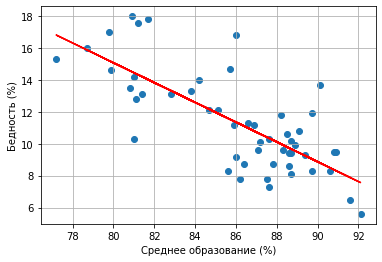

---------Анализ остатков---------

Kolmogorov–Smirnov test
Уровень значимости = 0.484
H0 - accepted
Распределение нормальное
Stat: 0.1142

Shapiro–Wilk test
Уровень значимости = 0.183
H0 - accepted
Распределение нормальное
Stat: 0.968



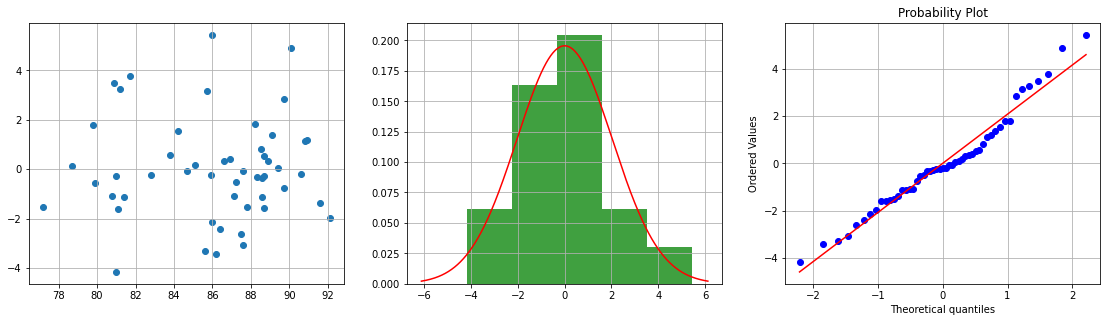

In [16]:
display(df[['poverty','hs_grad']].agg(['count','mean', 'std','min', 'max']).T)

X = df.hs_grad.to_numpy()
Y = df.poverty

print('\n---------Проверка на нормальное распределение ---------\n')

for i in [X,Y]:
    check_normal_distribution(i)


print('\n---------Корреляция ---------\n')

plt.scatter(X,Y)

plt.grid(True)
plt.show()

corr_info_by_method(X, Y, stats.pearsonr)
corr_info_by_method(X, Y, stats.spearmanr)
corr_info_by_method(X, Y, stats.kendalltau)
    
    
print('---------Линейная регрессия---------\n')

model_lr =  LR().fit(X.reshape((-1, 1)), Y)
b_0 = model_lr.intercept_
b_1 = model_lr.coef_[0]

print(f'y = {round(b_0, 3)} + ({round(b_1, 3)}) * x')
print('Intercept (b_0):', b_0)
print('Slope (b_1):    ', b_1)
print('Score:          ', model_lr.score(X.reshape((-1, 1)),Y))

y_data_model_lr = [b_0 + b_1*x for x in X]
plt.plot(X, y_data_model_lr, color='r')

plt.scatter(X,Y)

plt.xlabel('Среднее образование (%)')  # Подпись по оси X
plt.ylabel('Бедность (%)')  # Подпись по оси Y

plt.grid(True)
plt.show()

# corr_info_by_method(X, Y, stats.pearsonr)
# corr_info_by_method(X, Y, stats.spearmanr)
# corr_info_by_method(X, Y, stats.kendalltau)

print('---------Анализ остатков---------\n')

mean_y = np.mean(Y)
list_sse = [Y[x] - y_data_model_lr[x] for x in range(len(Y))]

norm_test_info_by_method(stats.zscore(list_sse), stats.kstest, 'Kolmogorov–Smirnov test')
norm_test_info_by_method(list_sse, stats.shapiro, 'Shapiro–Wilk test')

mean = np.mean(list_sse)
sd = np.std(list_sse)

plt.figure(figsize = [6.4*3, 4.8])  # Создаем фигуру qq_plot

plt.subplot(1, 3, 1)
plt.scatter(X, list_sse)
plt.grid(True)  # Включить сетку

plt.subplot(1, 3, 2)
n, bins, patches = plt.hist(list_sse, 5, density=True, facecolor='g', alpha=0.75)
x = np.linspace(mean - 3*sd, mean + 3*sd, 1000)  # Делаем массив значений Z-распределения
plt.plot(x, stats.norm.pdf(x, mean, sd), color='red', label='Z-распределение')
plt.grid(True)  # Включить сетку
 
plt.subplot(1, 3, 3)
stats.probplot(list_sse, dist="norm", plot=plt)  
plt.grid(True)  # Включить сетку
    
plt.show()  # Показать фигуру

# Множественная регрессия  <a class="anchor" id="line_7"></a>

In [102]:
import seaborn as sns
import statsmodels.formula.api as sm

In [33]:
df.head(3)

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1


<b>df[columns_name].corr()</b>

Method of correlation:<br>
* <b>pearson</b> : standard correlation coefficient<br>
* <b>kendall</b> : Kendall Tau correlation coefficient<br>
* <b>spearman</b> : Spearman rank correlation<br>

,count,mean,std,min,max
poverty,51.0,11.349020,3.099185,5.6,18.0
metro_res,51.0,72.249020,15.275894,38.2,100.0
white,51.0,81.719608,13.897223,25.9,97.1
hs_grad,51.0,86.011765,3.725998,77.2,92.1
female_house,51.0,11.633333,2.356155,7.8,18.9



---------Проверка на нормальное распределение ---------

__POVERTY__
Kolmogorov–Smirnov test
Уровень значимости = 0.672
H0 - accepted
Распределение нормальное
Stat: 0.0982

Shapiro–Wilk test
Уровень значимости = 0.282
H0 - accepted
Распределение нормальное
Stat: 0.9726



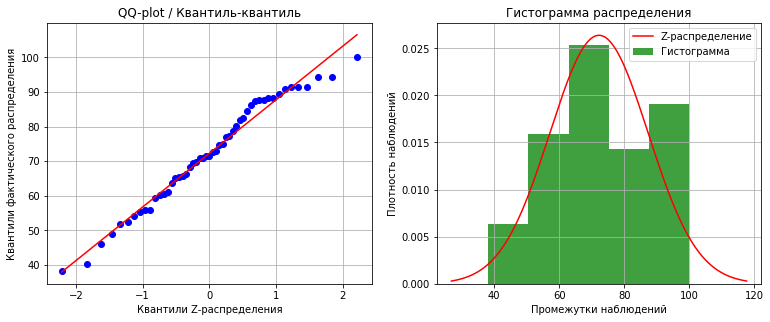

__METRO_RES__
Kolmogorov–Smirnov test
Уровень значимости = 0.228
H0 - accepted
Распределение нормальное
Stat: 0.1426

Shapiro–Wilk test
Уровень значимости = 0.0
H0 - reject
Распределение НЕ нормальное
Stat: 0.8158



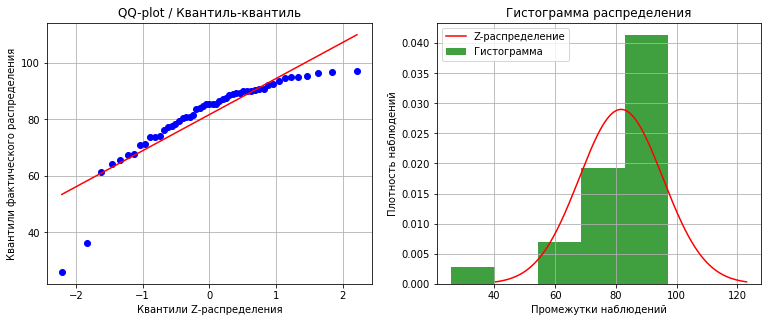

__WHITE__
Kolmogorov–Smirnov test
Уровень значимости = 0.399
H0 - accepted
Распределение нормальное
Stat: 0.1222

Shapiro–Wilk test
Уровень значимости = 0.014
H0 - reject
Распределение НЕ нормальное
Stat: 0.9411



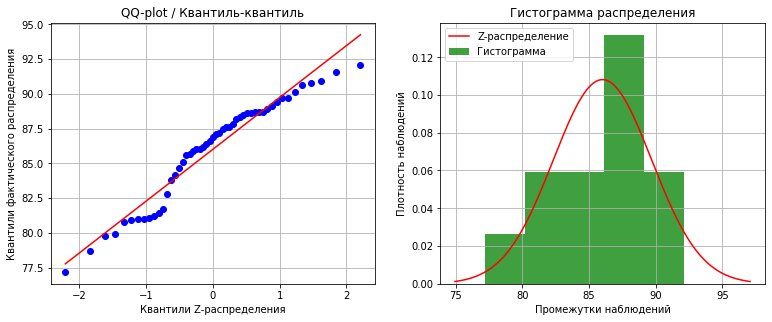

__HS_GRAD__
Kolmogorov–Smirnov test
Уровень значимости = 0.595
H0 - accepted
Распределение нормальное
Stat: 0.1046

Shapiro–Wilk test
Уровень значимости = 0.011
H0 - reject
Распределение НЕ нормальное
Stat: 0.9389



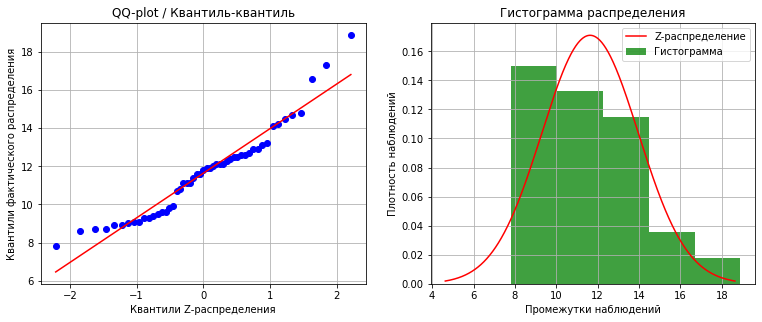

__FEMALE_HOUSE__
Kolmogorov–Smirnov test
Уровень значимости = 0.382
H0 - accepted
Распределение нормальное
Stat: 0.124

Shapiro–Wilk test
Уровень значимости = 0.054
H0 - accepted
Распределение нормальное
Stat: 0.9555



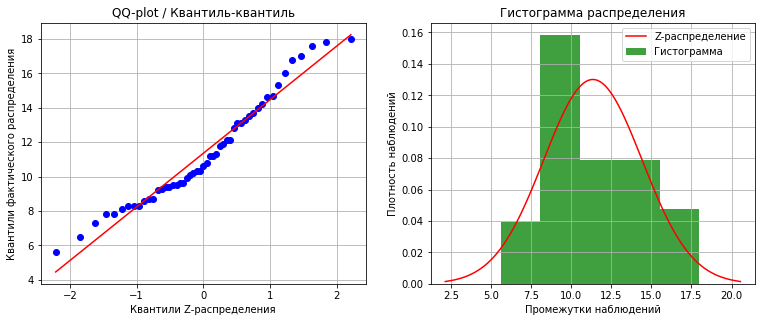


---------Корреляция ---------

method='pearson'


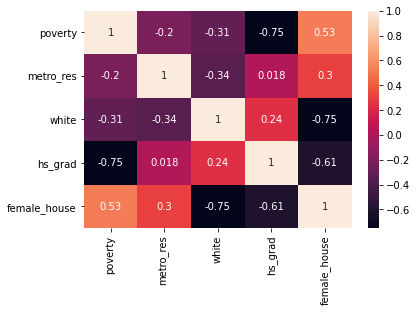

method='kendall'


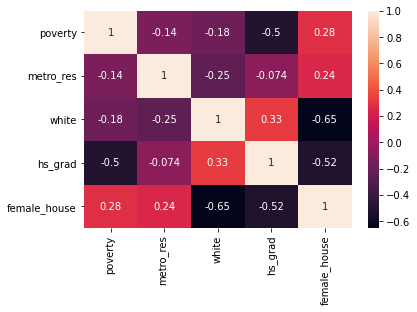

method='spearman'


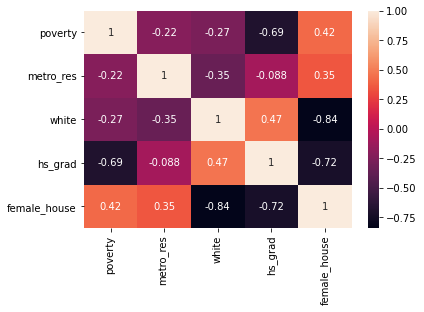

--------- Множественная линейная регрессия---------

y = 66.477 + (-0.056)*metro_res + (-0.048)*white + (-0.555)*hs_grad + (0.051)*female_house
Intercept (b_0): 66.4765254053879
Slope: (-0.056)*metro_res + (-0.048)*white + (-0.555)*hs_grad + (0.051)*female_house
Score: 0.6415759298804308


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                poverty   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     20.58
Date:                Mon, 30 Aug 2021   Prob (F-statistic):           8.88e-10
Time:                        17:05:35   Log-Likelihood:                -103.39
No. Observations:                  51   AIC:                             216.8
Df Residuals:                      46   BIC:                             226.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       66.4765     12.590      5.280      0.000      41.134      91.819
metro_res       -0.0563      0.020     -2.881      0.006      -0.096      -0.017
white           -0.0481      0.033     -1.456      0.152      -0.115       0.018
hs_grad         -0.5547      0.105     -5.288      0.000      -0.766      -0.344
female_house     0.0505      0.243      0.208      0.836      -0.439       0.540
==============================================================================
Omnibus:                        3.254   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.197   Jarque-Bera (JB):                3.043
Skew:                           0.585   Prob(JB):                        0.218
Kurtosis:                       2.750   Cond. No.                     6.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

---------Анализ остатков---------

Kolmogorov–Smirnov test
Уровень значимости = 0.374
H0 - accepted
Распределение нормальное
Stat: 0.1248

Shapiro–Wilk test
Уровень значимости = 0.065
H0 - accepted
Распределение нормальное
Stat: 0.9575



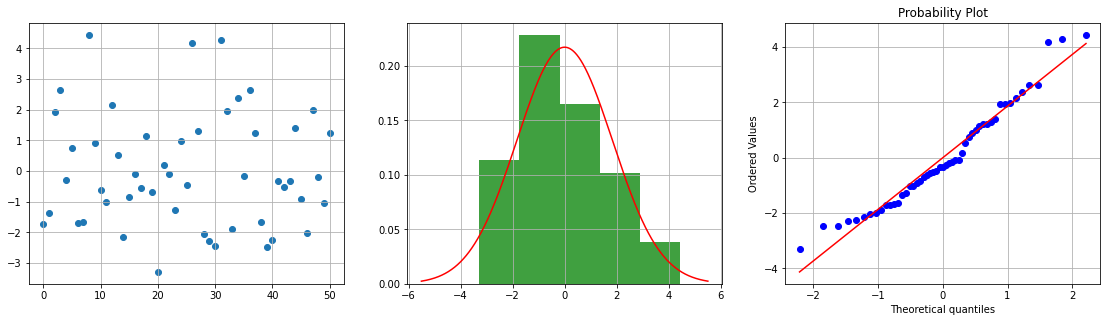

In [104]:
columns_name = ['poverty'] + ['metro_res', 'white', 'hs_grad', 'female_house'] 

display(df[columns_name].agg(['count','mean', 'std','min', 'max']).T)

X = df[['metro_res', 'white', 'hs_grad', 'female_house']].to_numpy()
Y = df.poverty

print('\n---------Проверка на нормальное распределение ---------\n')

for i, name in zip([*X.T,Y], columns_name):
    print('__\033[1m'+ name.upper() + '\033[0m__')
    check_normal_distribution(i)


print('\n---------Корреляция ---------\n')

print("method='pearson'")
hm = sns.heatmap(df[columns_name].corr(method='pearson'),  cbar=True,  annot=True);
plt.show();
print("method='kendall'")
hm = sns.heatmap(df[columns_name].corr(method='kendall'),  cbar=True,  annot=True);
plt.show();
print("method='spearman'")
hm = sns.heatmap(df[columns_name].corr(method='spearman'),  cbar=True,  annot=True);
plt.show();


print('--------- Множественная линейная регрессия---------\n')

model_lr =  LR().fit(X, Y)
b_0 = model_lr.intercept_
b_n = model_lr.coef_
tmp_str = ' + '.join([f'({round(x, 3)})*{name}' for x, name in zip(b_n, columns_name[1:])])
print(f'y = {round(b_0, 3)} + {tmp_str}')
print('Intercept (b_0):', b_0)
print('Slope:', tmp_str)
print('Score:', model_lr.score(X,Y))


result = sm.ols(formula="poverty ~ metro_res + white + hs_grad + female_house", data=df).fit()
display(result.summary())


y_data_model_lr = [b_0 + sum(b_n*x) for x in X]
# plt.plot(X, y_data_model_lr, color='r')

# plt.scatter(X,Y)

# plt.xlabel('Среднее образование (%)')  # Подпись по оси X
# plt.ylabel('Бедность (%)')  # Подпись по оси Y

# plt.grid(True)
# plt.show()

# corr_info_by_method(X, Y, stats.pearsonr)
# corr_info_by_method(X, Y, stats.spearmanr)
# corr_info_by_method(X, Y, stats.kendalltau)

print('---------Анализ остатков---------\n')

mean_y = np.mean(Y)
list_sse = [Y[x] - y_data_model_lr[x] for x in range(len(Y))]

norm_test_info_by_method(stats.zscore(list_sse), stats.kstest, 'Kolmogorov–Smirnov test')
norm_test_info_by_method(list_sse, stats.shapiro, 'Shapiro–Wilk test')

mean = np.mean(list_sse)
sd = np.std(list_sse)

plt.figure(figsize = [6.4*3, 4.8])  # Создаем фигуру qq_plot

plt.subplot(1, 3, 1)
plt.scatter(range(len(list_sse)), list_sse)
plt.grid(True)  # Включить сетку

plt.subplot(1, 3, 2)
n, bins, patches = plt.hist(list_sse, 5, density=True, facecolor='g', alpha=0.75)
x = np.linspace(mean - 3*sd, mean + 3*sd, 1000)  # Делаем массив значений Z-распределения
plt.plot(x, stats.norm.pdf(x, mean, sd), color='red', label='Z-распределение')
plt.grid(True)  # Включить сетку
 
plt.subplot(1, 3, 3)
stats.probplot(list_sse, dist="norm", plot=plt)  
plt.grid(True)  # Включить сетку
    
plt.show()  # Показать фигуру